Šah
==

Šah je strateška igra na ploči za dva igrača. Razvila se od indijske igre _chaturanga_ u sedmom stoljeću te zadobila moderni oblik i pravila u Europi u 15. stoljeću. Danas pravila turnirskog šaha propisuje Svjetska šahovska federacija (FIDE).\
U nastavku teksta pretpostavlja se da je čitatelj upoznat s osnovnim pravilima igre (u suprotnom, može pogledati priloženi video).

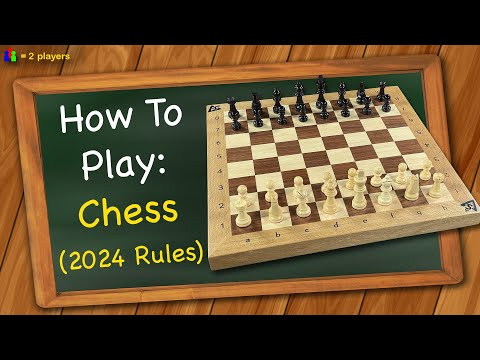

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('iPXcfS0UDlI')

Za prikaz šahovske ploče, koristimo Pythonov library `python-chess`. Osim toga upotrebljavamo biblioteke Numpy, Pandas i Matplotlib.

In [4]:
pip install chess

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
import chess
import io, chess.pgn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

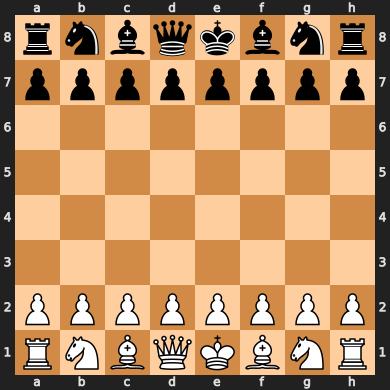

In [8]:
board = chess.Board()
board

Šahovska ploča sastoji se od 8 redaka označenih brojevima 1-8 te 8 stupaca označenih slovima a-h, pomoću kojih bilježimo polja. Na primjer, u početnoj poziciji, bijela dama je na polju d1, a crni kralj na e8.
Jedan potez sastoji se od pomicanja figure od strane oba igrača. Poteze bilježimo tzv. algebarskom notacijom, koristeći simbol za figuru te zapis polja na koji se pomiče, prvo za bijelog, a zatim za crnog igrača. Slova koja simboliziraju figure su sljedeća:
* K - kralj (king)
* Q - dama (queen)
* R - top (rook)
* B - lovac (bishop)
* N - skakač (knight).

Pješaci nemaju poseban simbol. Malu rohadu (na kraljevoj strani) označavamo s 0-0, a veliku (na daminoj strani) s 0-0-0. \
Ako figura daje šah, to označavamo s **+**, a ako daje mat s **#**.

Zapišimo primjerice najbrži mogući mat:
1. g4 e5
2. f3 Qh4#

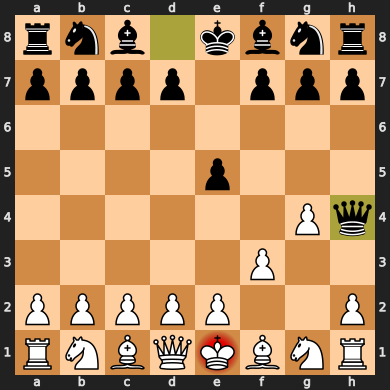

In [11]:
board.push_san("g4")
board.push_san("e5")
board.push_san("f3")
board.push_san("Qh4")
board

In [12]:
board.is_checkmate()

True

Tipična šahovska partija sastoji se od tri dijela: otvaranja, središnjice i završnice.

### Otvaranje

Otvaranje šahovske partije odvija se tijekom prvih 12 poteza. Neki od glavnih ciljeva otvaranja su:
1. zauzimanje centra: kontroliranje polja e4, d4, e5 i d5, s pješacima ili figurama.
2. razvoj figura: uključivanje skakača i lovaca u igru.
3. rohada: micanje kralja iz centra i uvođenje topa u igru.

In [167]:
def moveList(game):
    """Funkcija koja vraća poteze u obliku liste, za lakse iteriranje po njima."""
    moves=[]
    for move in game.mainline_moves():
        moves.append(move)
    return moves

In [490]:
def play(board,moves):
    """Funkcija koja vraca plocu s odigranim sljedecim potezom iz liste."""
    if moves:
        if type(moves[0])==chess.Move: board.push(moves[0])
        else: board.push_san(moves[0])
        del(moves[0])
    return board

In [492]:
def playAll(board,moves):
    """Funkcija koja vraca plocu s odigranim svim potezima iz liste."""
    while moves:
        if type(moves[0])==chess.Move: board.push(moves[0])
        else: board.push_san(moves[0])
        del(moves[0])
    return board

Evo primjera pozicije koja bi mogla nastati u otvaranju.

In [689]:
def italian():
    """Varijanta talijanske partije."""
    pgn = io.StringIO("1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5 4. 0-0 Nf6 5. d3 0-0")
    game = chess.pgn.read_game(pgn)
    return game

board = chess.Board()
moves = moveList(italian())

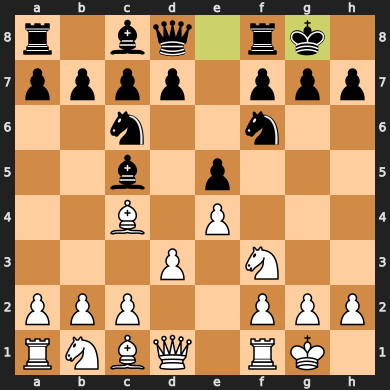

In [711]:
play(board,moves)

Teorija otvaranja vrlo je široka i dobro razvijena grana šaha, koja proučava moguće varijante i poteze u otvaranju. Većina otvaranja koja se igra na visokoj razini ima dodjeljeno ime po državi ili igraču koji ga je razvio. Otvaranje na ploči gore je varijanta tzv. talijanke.

Talijanka je otvaranje koje se često preporučuje početnicima, zato što slijedi osnovne principe i omogućava brz razvoj figura. Stavljajući lovca na c4, bijeli se odmah usmjerava prema najslabijem polju u crnoj poziciji, f7 (polje koje na početku brani samo kralj). Ako želi igrati agresivnije, bijeli može nastaviti s Ng5, pa čak i žrtvovati skakača ili lovca na f7. Pogledajmo prvu partiju u kojoj se pojavila takva varijanta, Polerio-Domenico iz 1610. godine:

In [757]:
def friedliver():
    pgn = io.StringIO("1.e4 e5 2.Nf3 Nc6 3.Bc4 Nf6 4.Ng5 d5 5.exd5 Nxd5"+
        "6.Nxf7 Kxf7 7.Qf3+ Ke6 8.Nc3 Ne7 9.d4 c6 10.Bg5 h6 11.Bxe7 Bxe7"+
        "12.O-O-O Rf8 13.Qe4 Rxf2 14.dxe5 Bg5+ 15.Kb1 Rd2 16.h4 Rxd1+"+
        "17.Rxd1 Bxh4 18.Nxd5 cxd5 19.Rxd5 Qg5 20.Rd6+ Ke7 21.Rg6")
    game = chess.pgn.read_game(pgn)
    return game

board = chess.Board()
moves = moveList(friedliver())

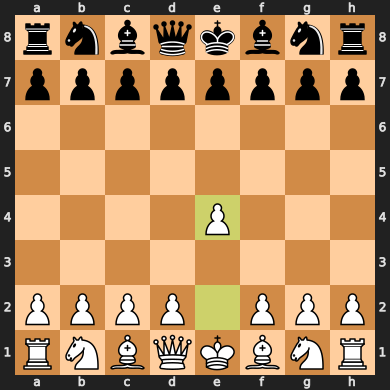

In [759]:
play(board,moves)

Partija je završila predajom crnog, kojem nije preostalo dobrih poteza - čim makne damu, bijeli top će uzeti pješaka na g7 i napasti kralja, što neizbježno vodi u mat, na primjer u sljedećoj varijanti:

In [735]:
var = ["Qh5", "Rg7", "Kf8", "Rg8", "Ke7", "Qh7", "Qf7", "Qf7"]

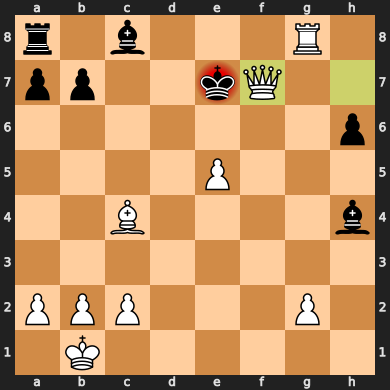

In [753]:
play(board,var)

Iz baze podataka dostupne na [chessgames.com](chessgames.com) dobivamo statistiku za moguće početne poteze, igrane u majstorskim partijama od 15. stoljeća do danas.

In [27]:
start = pd.read_csv('start.txt', sep=r"\t\s*", engine='python')
start

,potez,broj partija,bijeli dobiva,remi,crni dobiva
0,1. e4,"843,172",37.6%,32.5%,29.9%
1,1. d4,"624,840",37.5%,35.4%,27%
2,1. Nf3,"168,442",37.1%,37.9%,25.1%
3,1. c4,"129,019",38%,36.1%,25.9%
4,1. g3,"12,397",37.8%,35.4%,26.8%
5,1. f4,"6,780",33.2%,24.7%,42.1%
6,1. b3,"6,672",37.2%,29.5%,33.3%
7,1. Nc3,"2,816",38.1%,25.4%,36.5%
8,1. b4,"1,685",31.9%,22.8%,45.2%
9,1. e3,878,33.5%,20.6%,45.9%


Primjećujemo da je svih 20 mogućnosti za prvi potez (16 poteza pješacima i 4 skakačima) igrano u nekoj partiji te da najčešće igrani potezi (e4, d4, Nf3, c4) slijede osnovni princip zauzimanja centra.

In [29]:
def numeric(data):
    """Pomocna funkcija za pretvaranje stringovnih u brojevne podatke."""
    
    if(data['broj partija'].dtype!='int64'):
        data['broj partija'] = data['broj partija'].str.replace(",","")
        data['broj partija'] = pd.to_numeric(data['broj partija'])

    if(data['bijeli dobiva'].dtype!='float64'):
        data['bijeli dobiva'] = data['bijeli dobiva'].str.replace("%","")
        data['remi'] = data['remi'].str.replace("%","")
        data['crni dobiva'] = data['crni dobiva'].str.replace("%","")

        data['bijeli dobiva'] = pd.to_numeric(data['bijeli dobiva'])
        data['remi'] = pd.to_numeric(data['remi'])
        data['crni dobiva'] = pd.to_numeric(data['crni dobiva'])

    return data

In [30]:
start = numeric(start)
start

,potez,broj partija,bijeli dobiva,remi,crni dobiva
0,1. e4,843172,37.6,32.5,29.9
1,1. d4,624840,37.5,35.4,27.0
2,1. Nf3,168442,37.1,37.9,25.1
3,1. c4,129019,38.0,36.1,25.9
4,1. g3,12397,37.8,35.4,26.8
5,1. f4,6780,33.2,24.7,42.1
6,1. b3,6672,37.2,29.5,33.3
7,1. Nc3,2816,38.1,25.4,36.5
8,1. b4,1685,31.9,22.8,45.2
9,1. e3,878,33.5,20.6,45.9


In [1009]:
def winstat(data,headstart=-1,tailend=-1):
    """Funkcija koja ispisuje prosjecni rezultat u postotcima."""
    if headstart>0: 
        data=data.head(headstart) 
    elif tailend>0:
        data=data.tail(tailend)
    headstart=tailend=data.shape[0]
        
    suma=data['broj partija'].sum()
    bijeli=remi=crni=0
    for i in range(headstart):
        bijeli+=data['broj partija'][i]*data['bijeli dobiva'][i]/100
        remi+=data['broj partija'][i]*data['remi'][i]/100
        crni+=data['broj partija'][i]*data['crni dobiva'][i]/100
    
    print("Bijeli dobiva u", round(bijeli*100/suma,3), "posto partija.")
    print("Remi se dogodi u", round(remi*100/suma,3), "posto partija.")
    print("Crni dobiva u", round(crni*100/suma,3), "posto partija.")

In [987]:
winstat(start)

Bijeli dobiva u 37.526 posto partija.
Remi se dogodi u 34.209 posto partija.
Crni dobiva u 28.239 posto partija.


In [1033]:
def graph(data, title, headstart=-1, tailend=-1):
    """Funkcija za prikaz rezultata partija u % na stupcastom grafu."""
    
    if headstart>0: 
        data=data.head(headstart) 
    elif tailend>0:
        data=data.tail(tailend)
    headstart=tailend=data.shape[0]
        
    fig, ax = plt.subplots()
    ax.set(ylim=(0, 100))
    
    rezultat = {'bijeli dobiva': data['bijeli dobiva'],
                'remi': data['remi'],
                'crni dobiva': data['crni dobiva']}
    colors = ['1', '0.8', '0']
    
    bottom = np.zeros(headstart)
    i=0
    for boolean, rez in rezultat.items():
        bar = ax.bar(data['potez'], rez, label=boolean, bottom=bottom, color=colors[i], edgecolor='black')
        bottom += rez
        i+=1
    ax.set_ylabel('rezultat u postotcima')
    ax.set_title(title)
    ax.legend(loc="best", edgecolor='black')
    
    plt.show()

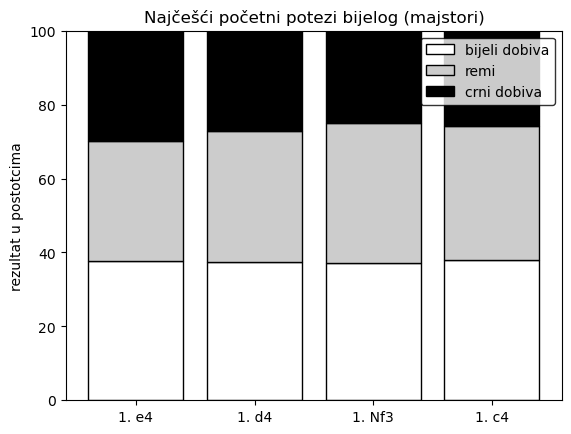

In [1037]:
graph(start, title="Najčešći početni potezi bijelog (majstori)", headstart=4)

Pogledajmo sad statistiku za partije igrača svih razina, igranih na Free Internet Chess Serveru (FICS). Njihova baza podataka dostupna je na [ficsgames.org](https://www.ficsgames.org/).

In [927]:
noobstart = pd.read_csv('ficsstart.txt', sep=r"\t\s*", engine='python')
noobstart

,Move,Games,[%],Win%,Black wins,Draws,White wins
0,Total,1284100,100.0%,52.3%,None,None,None
1,1. e4,652053,50.8%,50.6%,43%,13%,44%
2,1. d4,403573,31.4%,54%,38%,16%,46%
3,1. Nf3,83978,6.5%,56.3%,34%,20%,46%
4,1. c4,80629,6.3%,56.9%,35%,17%,48%
5,1. f4,13774,1.1%,52.1%,43%,9%,48%
6,1. e3,8291,0.6%,37%,60%,6%,34%
7,1. b3,7824,0.6%,50.2%,44%,11%,45%
8,1. g3,7699,0.6%,47.2%,46%,14%,40%
9,1. Nc3,7111,0.6%,52.4%,44%,7%,49%


Prilagođavamo ove podatke kako bi bili istog oblika kao prethodni:

In [929]:
def adjust(data):
    data.pop('Win%')
    data.pop('[%]')
    data = data.reindex(columns=['Move','Games','White wins','Draws','Black wins'])
    data = data.rename({'Move': 'potez', 'Games': 'broj partija',
                        'White wins': 'bijeli dobiva', 'Draws': 'remi',
                        'Black wins': 'crni dobiva'}, axis='columns')
    data = data.drop([0])
    data.index -= 1 
    data = numeric(data)
    return data

In [931]:
noobstart = adjust(noobstart)
noobstart

,potez,broj partija,bijeli dobiva,remi,crni dobiva
0,1. e4,652053,44,13,43
1,1. d4,403573,46,16,38
2,1. Nf3,83978,46,20,34
3,1. c4,80629,48,17,35
4,1. f4,13774,48,9,43
5,1. e3,8291,34,6,60
6,1. b3,7824,45,11,44
7,1. g3,7699,40,14,46
8,1. Nc3,7111,49,7,44
9,1. g4,3954,47,5,48


In [1003]:
winstat(noobstart)

Bijeli dobiva u 45.01 posto partija.
Remi se dogodi u 14.425 posto partija.
Crni dobiva u 40.565 posto partija.


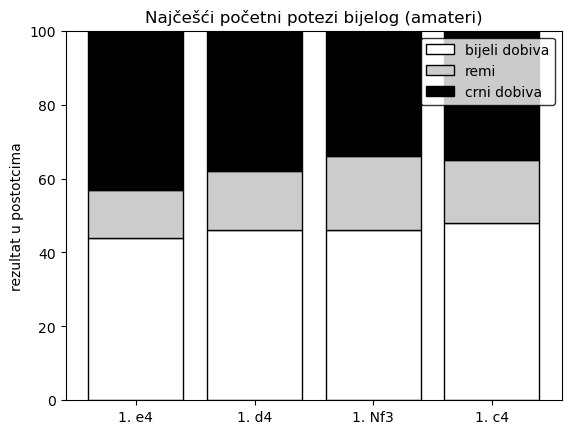

In [1039]:
graph(noobstart,title="Najčešći početni potezi bijelog (amateri)", headstart=4)

Vidljivo je da bijeli i dalje zadržava prednost, no crni ipak ima bolje šanse za pobjedu nego u majstorskim partijama.\
Također, kod amaterskih igrača, remi se znatno rjeđe postiže.

In [44]:
print("Ukupno majstorskih partija:", start['broj partija'].sum())
print("Ukupno amaterskih partija:", noobstart['broj partija'].sum())
print("Broj majstorskih partija s nestandardnim otvaranjima:", start['broj partija'][4:].sum())
print("Broj amaterskih partija s nestandardnim otvaranjima:", noobstart['broj partija'][4:].sum())

Ukupno majstorskih partija: 1798984
Ukupno amaterskih partija: 1284100
Broj majstorskih partija s nestandardnim otvaranjima: 33511
Broj amaterskih partija s nestandardnim otvaranjima: 63867


Zanimljivo je uočiti i da, unatoč manjem broju amaterskih partija u korištenim bazama podataka, ima skoro dvostruko više partija s manje principijelnim početnim potezima (dakle, potezima različitih od e4, d4, c4 ili Nf3) kod amatera nego kod majstora. Takvi su potezi česti kod igrača koji su se tek počeli upoznavati sa šahom. (Na primjer, sigurno ste i sami kao početnici nekad imali ideju igrati 1. a4 ili 1. h4, kako biste što prije "oslobodili" topove. :) U takvim partijama pravo prvog poteza ne donosi bijelom značajnu prednost, naprotiv, ako ga crni kazni za lošu igru u otvaranju, bijeli može upasti u goru poziciju te izgubiti. To se vidi i u statistici majstorskih partija, a kod amaterskih je još izraženije:

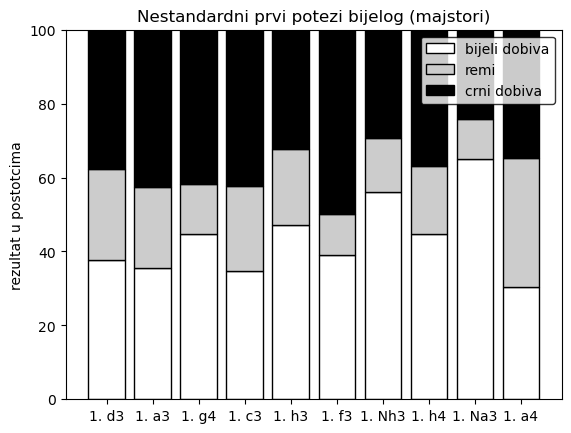

In [1041]:
graph(start, title="Nestandardni prvi potezi bijelog (majstori)", tailend=10)

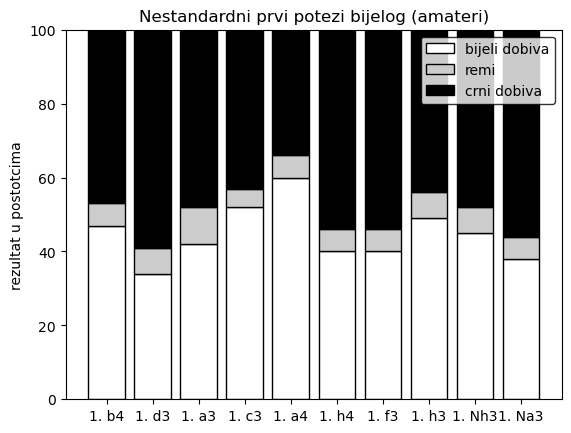

In [1043]:
graph(noobstart,title="Nestandardni prvi potezi bijelog (amateri)",tailend=10)

Partije koje nastaju nakon početnog poteza 1. e4 nazivaju se otvorenim igrama. Često vode do oštre i agresivne borbe. \
Pogledajmo najčešće odgovore crnog u majstorskim partijama:

In [513]:
e4 = pd.read_csv('e4.txt', sep=r"\t\s*", engine='python')
e4 = numeric(e4)
e4

,potez,broj partija,bijeli dobiva,remi,crni dobiva
0,1...c5,355027,36.0,31.9,32.1
1,1...e5,225145,38.1,34.5,27.4
2,1...e6,102101,39.6,32.5,27.9
3,1...c6,63996,36.9,35.0,28.1
4,1...d6,30698,41.1,29.3,29.6
5,1...g6,24093,37.3,27.6,35.2
6,1...d5,18186,43.3,28.1,28.6
7,1...Nf6,16898,40.2,29.4,30.4
8,1...Nc6,4678,42.3,24.5,33.1
9,1...b6,1713,46.1,23.3,30.6


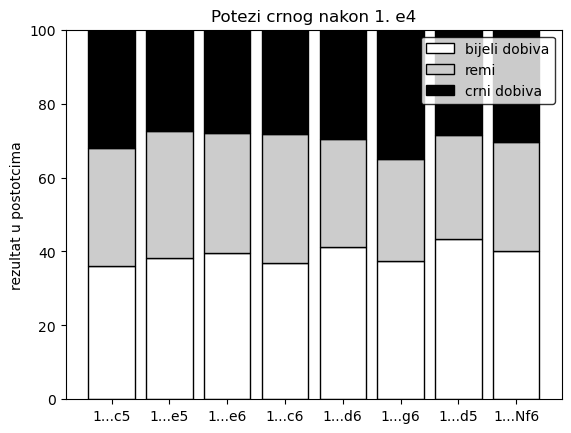

In [51]:
graph(e4,8)

Najčešći odgovor crnog na e4, koji mu ujedno pruža dobre šanse za pobjedu, jest 1... c5. To je uvod u tzv. sicilijansku obranu, vrlo teorijski razvijeno otvaranje bogato varijantama i mogućnostima za napad za oba igrača. Glavna je Najdorfova varijanta nazvana po njenom tvorcu, argentinskom šahistu Miguelu Najdorfu.

In [525]:
def najdorf():
    pgn = io.StringIO("1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. Nc3 a6")
    game = chess.pgn.read_game(pgn)
    return game

board = chess.Board()
moves = moveList(najdorf())

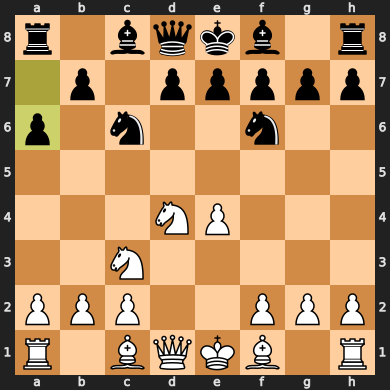

In [549]:
play(board,moves)

Crni igra c5 kako bi razmjenio svog c pješaka za centralnog d pješaka bijelog te tako oslabio kontrolu bijelog nad centrom. Nakon standardnog razvoja skakača slijedi na prvu pomalo neobičan Najdorfov potez a6. Njegov cilj je kontrola nad poljem b5, na koje bi inače mogao uskočiti jedan od bijelih skakača, te priprema za napredovanje crnim b pješakom (sa b7 na b5 i b4, gdje tjera bijelog skakača s c3).

In [553]:
def ruylopez():
    pgn = io.StringIO("1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Ba4 Nf6 5. 0-0 Be7 6. Re1 b5 7. Bb3 0-0 8. c3")
    game = chess.pgn.read_game(pgn)
    return game

board = chess.Board()
moves = moveList(ruylopez())

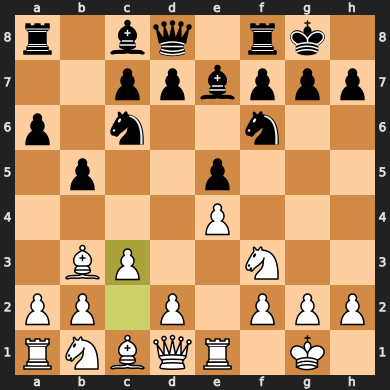

In [583]:
play(board,moves)

In [853]:
def french():
    pgn = io.StringIO("1. e4 e6 2. d4 d5 3. Nd2 c5 4. exd5 exd5 5. Ngf3 Nc6 6. Bb5 Bd6 7. dxc5 Bxc5 8. O-O Ne7 9. Nb3 Bd6")
    game = chess.pgn.read_game(pgn)
    return game

board = chess.Board()
moves = moveList(french())

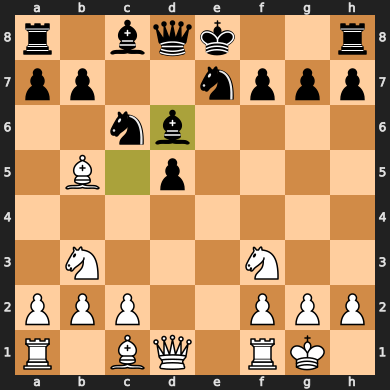

In [837]:
play(board,moves)

In [855]:
def caro():
    pgn = io.StringIO("1. e4 c6 2. d4 d5")
    game = chess.pgn.read_game(pgn)
    return game

board = chess.Board()
moves = moveList(caro())

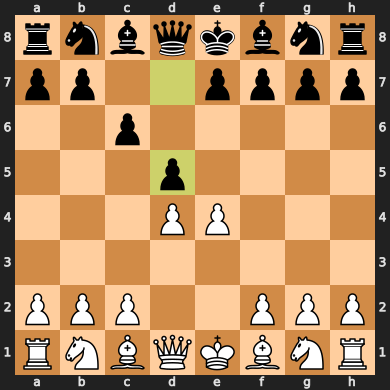

In [851]:
play(board,moves)

In [933]:
noobe4 = pd.read_csv('ficse4.txt', sep=r"\t\s*", engine='python')
noobe4 = adjust(noobe4)
noobe4

,potez,broj partija,bijeli dobiva,remi,crni dobiva
0,1. ... c5,230137,40,14,46
1,1. ... e5,206746,44,14,42
2,1. ... e6,78019,47,14,39
3,1. ... c6,45183,41,15,44
4,1. ... d5,25191,51,9,40
5,1. ... d6,20969,51,12,37
6,1. ... Nf6,14128,48,11,41
7,1. ... g6,11418,52,12,36
8,1. ... Nc6,8590,51,8,41
9,1. ... b6,3292,53,6,41


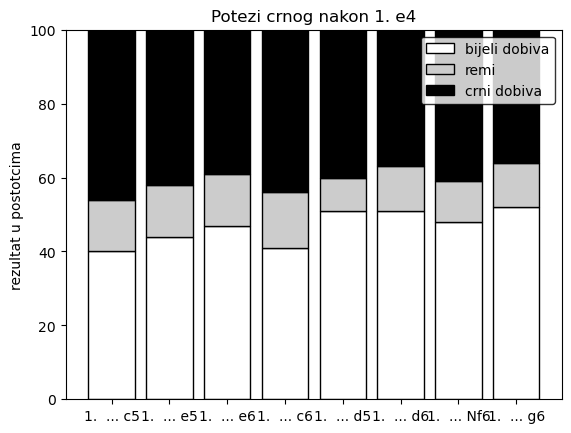

In [935]:
graph(noobe4,8)

In [859]:
def qgd():
    pgn = io.StringIO("1. d4 Nf6 2. c4 e6 3. Nf3 d5 4. Nc3 c6 5. e3 Nbd7")
    game = chess.pgn.read_game(pgn)
    return game

board = chess.Board()
moves = moveList(qgd())

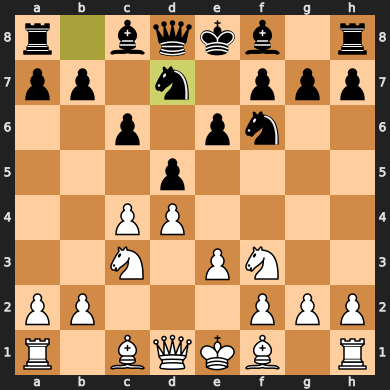

In [883]:
play(board,moves)

In [889]:
def kid():
    pgn = io.StringIO("1. d4 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. Nf3 O-O 6. Be2 e5")
    game = chess.pgn.read_game(pgn)
    return game

board = chess.Board()
moves = moveList(kid())

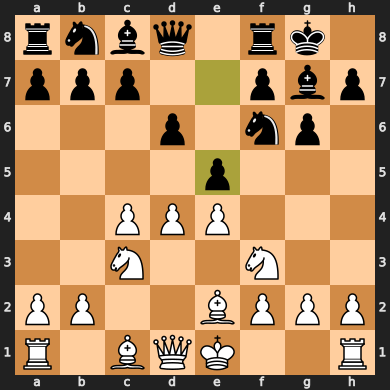

In [919]:
play(board,moves)